## **EM 624 Project - Analyze People Migration Data using Python**

In [19]:
# importing necessary libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from pandas.api.types import is_numeric_dtype

# importing the file
df = pd.read_csv("UN_Migrations.csv", header = 1)

# performing data cleaning
df = df.drop(columns=df.columns[[1,3,4,5]])
df.rename( columns={'Unnamed: 0':'Year', 'Unnamed: 2' : 'Destination'}, inplace=True)

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240) have mixed types.Specify dtype option on import or

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288
0,1990.0,WORLD,"153,011,473","6,548,526","2,366,800","6,823,350","180,284","921,727","2,041","3,792",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990.0,UN development groups,..,..,..,..,..,..,..,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990.0,More developed regions,"82,767,216","3,385,103","1,077,179","119,386","177,986","867,015","1,027","3,737",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990.0,Less developed regions,"70,244,257","3,163,423","1,289,621","6,703,964","2,298","54,712","1,014",55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990.0,Least developed countries,"11,060,221","482,753","239,756",0,0,"5,622",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# more data cleaning
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='all', axis=0, inplace=True)

df = df.fillna(0)
df = df.replace(',','', regex=True)

# changing the data type of year to "int"
df.iloc[:,0] = df.iloc[:,0].astype(int) 
df

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,WORLD,153011473,6548526,2366800,6823350,180284,921727,2041,3792,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
1,1990,UN development groups,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,1990,More developed regions,82767216,3385103,1077179,119386,177986,867015,1027,3737,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
3,1990,Less developed regions,70244257,3163423,1289621,6703964,2298,54712,1014,55,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
4,1990,Least developed countries,11060221,482753,239756,0,0,5622,0,0,...,286,2027,9,2510,71579,0,0,357,26254,75122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2019,Bermuda,19336,694,375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,2019,Canada,7960657,1055,3115,55339,16363,68822,0,0,...,6959,6799,0,22130,180258,0,0,3151,3956,11176
1978,2019,Greenland,5690,108,159,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,2019,Saint Pierre and Miquelon,990,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
 # filtering dataframe for cumulative information
 df1 = df.loc[(df['Destination'] == "WORLD" ) | (df['Destination'] == "More developed regions") | (df['Destination'] == "Less developed regions") | (df['Destination'] == "Least developed countries") | (df['Destination'] == "Less developed regions excluding least developed countries") | (df['Destination'] == "High-income countries") | (df['Destination'] == "Middle-income countries") | (df['Destination'] == "Upper-middle-income countries") | (df['Destination'] == "Lower-middle-income countries") | (df['Destination'] == "Low-income countries") | (df['Destination'] == "No income group available") | (df['Destination'] == "Africa") | (df['Destination'] == "Asia") | (df['Destination'] == "Europe") | (df['Destination'] == "Latin America and the Caribbean") | (df['Destination'] == "Northern America") | (df['Destination'] == "Oceania")]
 df1

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,WORLD,153011473,6548526,2366800,6823350,180284,921727,2041,3792,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
2,1990,More developed regions,82767216,3385103,1077179,119386,177986,867015,1027,3737,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
3,1990,Less developed regions,70244257,3163423,1289621,6703964,2298,54712,1014,55,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
4,1990,Least developed countries,11060221,482753,239756,0,0,5622,0,0,...,286,2027,9,2510,71579,0,0,357,26254,75122
5,1990,Less developed regions excluding least develop...,59184036,2680670,1049865,6703964,2298,49090,1014,55,...,180362,347430,4034,68445,80984,5600,167906,443678,32887,88286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2019,Asia,83559197,2486931,1559115,4432460,4913,46313,0,0,...,6263,453346,0,510,565531,0,0,1138887,831,318
1714,2019,Europe,82304539,311208,868939,488944,1080239,1759610,43,7818,...,97451,1455576,1137,324338,469341,1,1244,34528,82346,208529
1715,2019,Latin America and the Caribbean,11673288,220861,88624,493,344,1318,0,99,...,192260,56,233,1924877,496,15,16,31,33,236
1716,2019,Northern America,58647822,2584771,16148,135162,115508,89772,0,0,...,325459,66188,0,262075,1375520,0,0,71339,206440,63035


In [22]:
# correcting the data type for each column 
df1['Year'] = df1.Year.astype(int)

cols = len(df1.iloc[:,2:].columns)

for i in range(2,(cols+2)):
    col = df1.iloc[:,i]
    col = [s.replace(",", "") for s in col]
    col = np.array(col).astype(int)    
    df1.iloc[:,i] = col  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
# checking the data type of each column
dataTypeDict = dict(df1.dtypes)
print('Data type of each column of Dataframe :')
print(dataTypeDict)

Data type of each column of Dataframe :
{'Year': dtype('int64'), 'Destination': dtype('O'), 'Total': dtype('int64'), 'Other South': dtype('int64'), 'Other North': dtype('int64'), 'Afghanistan': dtype('int64'), 'Albania': dtype('int64'), 'Algeria': dtype('int64'), 'American Samoa': dtype('int64'), 'Andorra': dtype('int64'), 'Angola': dtype('int64'), 'Anguilla': dtype('int64'), 'Antigua and Barbuda': dtype('int64'), 'Argentina': dtype('int64'), 'Armenia': dtype('int64'), 'Aruba': dtype('int64'), 'Australia': dtype('int64'), 'Austria': dtype('int64'), 'Azerbaijan': dtype('int64'), 'Bahamas': dtype('int64'), 'Bahrain': dtype('int64'), 'Bangladesh': dtype('int64'), 'Barbados': dtype('int64'), 'Belarus': dtype('int64'), 'Belgium': dtype('int64'), 'Belize': dtype('int64'), 'Benin': dtype('int64'), 'Bermuda': dtype('int64'), 'Bhutan': dtype('int64'), 'Bolivia (Plurinational State of)': dtype('int64'), 'Bonaire, Sint Eustatius and Saba': dtype('int64'), 'Bosnia and Herzegovina': dtype('int64'),

## **Filtering data for the following years - 1990 and 1995**

In [24]:
df_first_decade = df1.loc[(df1['Year'] == 1990) | (df1['Year'] == 1995)]
df_first_decade.reset_index(drop=True, inplace=True) # resetting index
df_first_decade

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,WORLD,153011473,6548526,2366800,6823350,180284,921727,2041,3792,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
1,1990,More developed regions,82767216,3385103,1077179,119386,177986,867015,1027,3737,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
2,1990,Less developed regions,70244257,3163423,1289621,6703964,2298,54712,1014,55,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
3,1990,Least developed countries,11060221,482753,239756,0,0,5622,0,0,...,286,2027,9,2510,71579,0,0,357,26254,75122
4,1990,Less developed regions excluding least develop...,59184036,2680670,1049865,6703964,2298,49090,1014,55,...,180362,347430,4034,68445,80984,5600,167906,443678,32887,88286
5,1990,High-income countries,77802868,3803597,1223239,269933,131448,886589,68,3748,...,199100,65671,4376,124640,1046349,6472,223,430024,25738,40771
6,1990,Middle-income countries,65124366,1877678,987475,6544932,48836,30513,1973,44,...,38100,1341474,532,58342,190102,12,168016,25400,14403,123378
7,1990,Upper-middle-income countries,33285549,957059,376006,3152957,48298,4719,1954,42,...,37509,1176874,369,57468,82875,12,168016,19772,13173,88433
8,1990,Lower-middle-income countries,31838817,920619,611469,3391975,538,25794,19,2,...,591,164600,163,874,107227,0,0,5628,1230,34945
9,1990,Low-income countries,9790238,850549,145493,8485,0,4370,0,0,...,286,20875,0,2510,1422,0,0,68,45062,40216


## **Finding major flows of migration(meaning where to where) for the decade - 1990 to 2000**



### ***Some part of the code to highlight the maximum values was used from resources available on Google ***

In [25]:
df_first_decade = df_first_decade.drop(columns=df.columns[2])
df_first_decade = df_first_decade.loc[df_first_decade["Destination"] != "WORLD"] # removing the WORLD row

# highlighting maximum values of migration 
df_first_decade_numeric = df_first_decade.set_index(['Destination', 'Year']).select_dtypes('number')
idx1 = df_first_decade_numeric.iloc[:,1:].idxmax().drop_duplicates()
x_idx_max = df_first_decade_numeric.loc[idx1]
x_idx_max.style.highlight_max()

,,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),"Bonaire, Sint Eustatius and Saba",Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Curaçao,Cyprus,Czechia,Dem. People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Falkland Islands (Malvinas),Faroe Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Micronesia (Fed. States of),Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North Macedonia,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russian Federation,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Destination,Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Less developed regions,1990,3163423,1289621,6703964,2298,54712,1014,55,657561,1507,7192,206861,245538,5957,58440,34138,577538,1806,11037,5290740,5368,197314,27291,3934,219476,152,27911,181421,306,7417,23210,217423,2936,19700,490335,1014946,332498,11141,118156,65687,59577,104,37248,333194,101,301332,2771303,34331,81266,644795,21137,34777,47,21671,317111,3697,61262,4123,10393,8788,24141,340998,7398,1842,18623,78650,48407,1052357,734423,27735,145038,3737,34635,1573055,23,2,4169,3677,334762,2783,2825,6635,23624,117744,440513,243542,74,131890,513,19423,5666,1333,103035,338051,39303,26866,234107,21,42259,27354,88,5390223,1329206,112902,1361525,8334,0,112225,561591,13878,178363,243466,137811,95715,3064,65186,39535,231244,14480,138755,190974,498532,50934,178,30752,362,15924,131853,374545,1889,596082,244,311,10725,121233,9091,1835,44779,4950,279,166,241,2014,180509,2143412,640612,14775,954,740883,62829,2883,16685,263123,146346,298604,39,51529,2251,8324,11821,2895984,2946,44599,1266,283408,86781,684042,163445,398001,19894,11300,242337,58518,2962,151984,5096693,539

## **Filtering data for the following years - 2000 and 2005**

In [26]:
df_second_decade = df1.loc[(df1['Year'] == 2000) | (df1['Year'] == 2005)]
df_second_decade.reset_index(drop=True, inplace=True) # resetting index
df_second_decade

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,2000,WORLD,173588441,5169471,2209720,4606374,824413,1038048,3186,5624,...,235641,1575969,6423,319240,1885072,7402,166064,529396,160206,351996
1,2000,More developed regions,103961989,2154380,1013370,223080,819842,974880,1164,5574,...,74802,1247938,1339,230446,1669714,26,149,38196,37869,85215
2,2000,Less developed regions,69626452,3015091,1196350,4383294,4571,63168,2022,50,...,160839,328031,5084,88794,215358,7376,165915,491200,122337,266781
3,2000,Least developed countries,10063948,587660,258831,0,0,5868,0,0,...,257,1646,9,2264,102056,0,0,365,62881,106849
4,2000,Less developed regions excluding least develop...,59562504,2427431,937519,4383294,4571,57300,2022,50,...,160582,326385,5075,86530,113302,7376,165915,490835,59456,159932
5,2000,High-income countries,103029727,2808880,1162405,391093,748153,1005272,135,5584,...,195879,99431,5734,245251,1658830,7387,34,498665,37637,85101
6,2000,Middle-income countries,61158978,1397355,852717,4197991,76260,28013,3051,40,...,39505,1466908,494,70284,225551,15,166030,30604,33548,169168
7,2000,Upper-middle-income countries,34642477,716524,357616,2111759,75579,6201,3036,40,...,38907,1197974,369,69339,107851,15,166030,24762,32471,160011
8,2000,Lower-middle-income countries,26516501,680831,495101,2086232,681,21812,15,0,...,598,268934,125,945,117700,0,0,5842,1077,9157
9,2000,Low-income countries,8975609,944440,186374,17290,0,4405,0,0,...,257,9630,0,2264,691,0,0,127,89021,97727


## **Finding major flows of migration(meaning where to where) for the decade - 2000 to 2010**

In [27]:
df_second_decade = df_second_decade.drop(columns=df.columns[2])
df_second_decade = df_second_decade.loc[df_second_decade["Destination"] != "WORLD"] # removing the WORLD row

# highlighting maximum values of migration
df_second_decade_numeric = df_second_decade.set_index(['Destination', 'Year']).select_dtypes('number')
idx1 = df_second_decade_numeric.iloc[:,1:].idxmax().drop_duplicates()
x_idx_max = df_second_decade_numeric.loc[idx1]
x_idx_max.style.highlight_max()

## **Filtering data for the following years - 2010, 2015 and 2019**

In [28]:
df_third_decade = df1.loc[(df1['Year'] == 2010) | (df1['Year'] == 2015) | (df1['Year'] == 2019)]
df_third_decade.reset_index(drop=True, inplace=True) # resetting index
df_third_decade

,Year,Destination,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,2010,WORLD,220781909,5972807,2600643,5055805,1120305,1656453,2159,7926,...,338334,1880557,7846,558491,2356176,7462,143996,877385,208307,715395
1,2010,More developed regions,130613460,2550329,724441,361895,1114766,1577813,164,7012,...,174398,1459814,2239,450950,2059539,1,65,59371,62869,234019
2,2010,Less developed regions,90168449,3422478,1876202,4693910,5539,78640,1995,914,...,163936,420743,5607,107541,296637,7461,143931,818014,145438,481376
3,2010,Least developed countries,10432671,877444,445384,388,1037,6409,324,842,...,666,1199,71,2257,81279,0,0,358,59051,145082
4,2010,Less developed regions excluding least develop...,79735778,2545034,1430818,4693522,4502,72231,1671,72,...,163270,419544,5536,105284,215358,7461,143931,817656,86387,336294
5,2010,High-income countries,144282576,3336493,1332920,647230,1040355,1622567,121,7030,...,300609,139876,7168,478353,2136240,7451,43,840190,62506,234279
6,2010,Middle-income countries,65980003,1862617,1029378,4392970,78913,28572,1714,54,...,37059,1731813,560,77459,219225,11,143953,37077,56672,353328
7,2010,Upper-middle-income countries,40238761,960386,392022,2390782,78675,7265,1693,54,...,36465,1500572,391,76310,124276,11,143953,29973,55621,335999
8,2010,Lower-middle-income countries,25741242,902231,637356,2002188,238,21307,21,0,...,594,231241,169,1149,94949,0,0,7104,1051,17329
9,2010,Low-income countries,10040501,754574,228947,15605,1037,4914,324,842,...,666,8868,0,2257,711,0,0,118,89129,127788


## **Finding major flows of migration(meaning where to where) for the decade - 2010 to 2020**

In [29]:
df_third_decade = df_third_decade.drop(columns=df.columns[2])
df_third_decade = df_third_decade.loc[df_third_decade["Destination"] != "WORLD"] # removing the WORLD row

# highlighting maximum values of migration
df_third_decade_numeric = df_third_decade.set_index(['Destination', 'Year']).select_dtypes('number')
idx1 = df_third_decade_numeric.iloc[:,1:].idxmax().drop_duplicates()
x_idx_max = df_third_decade_numeric.loc[idx1]
x_idx_max.style.highlight_max()

## **Dynamics of Migration by Income for each Decade**

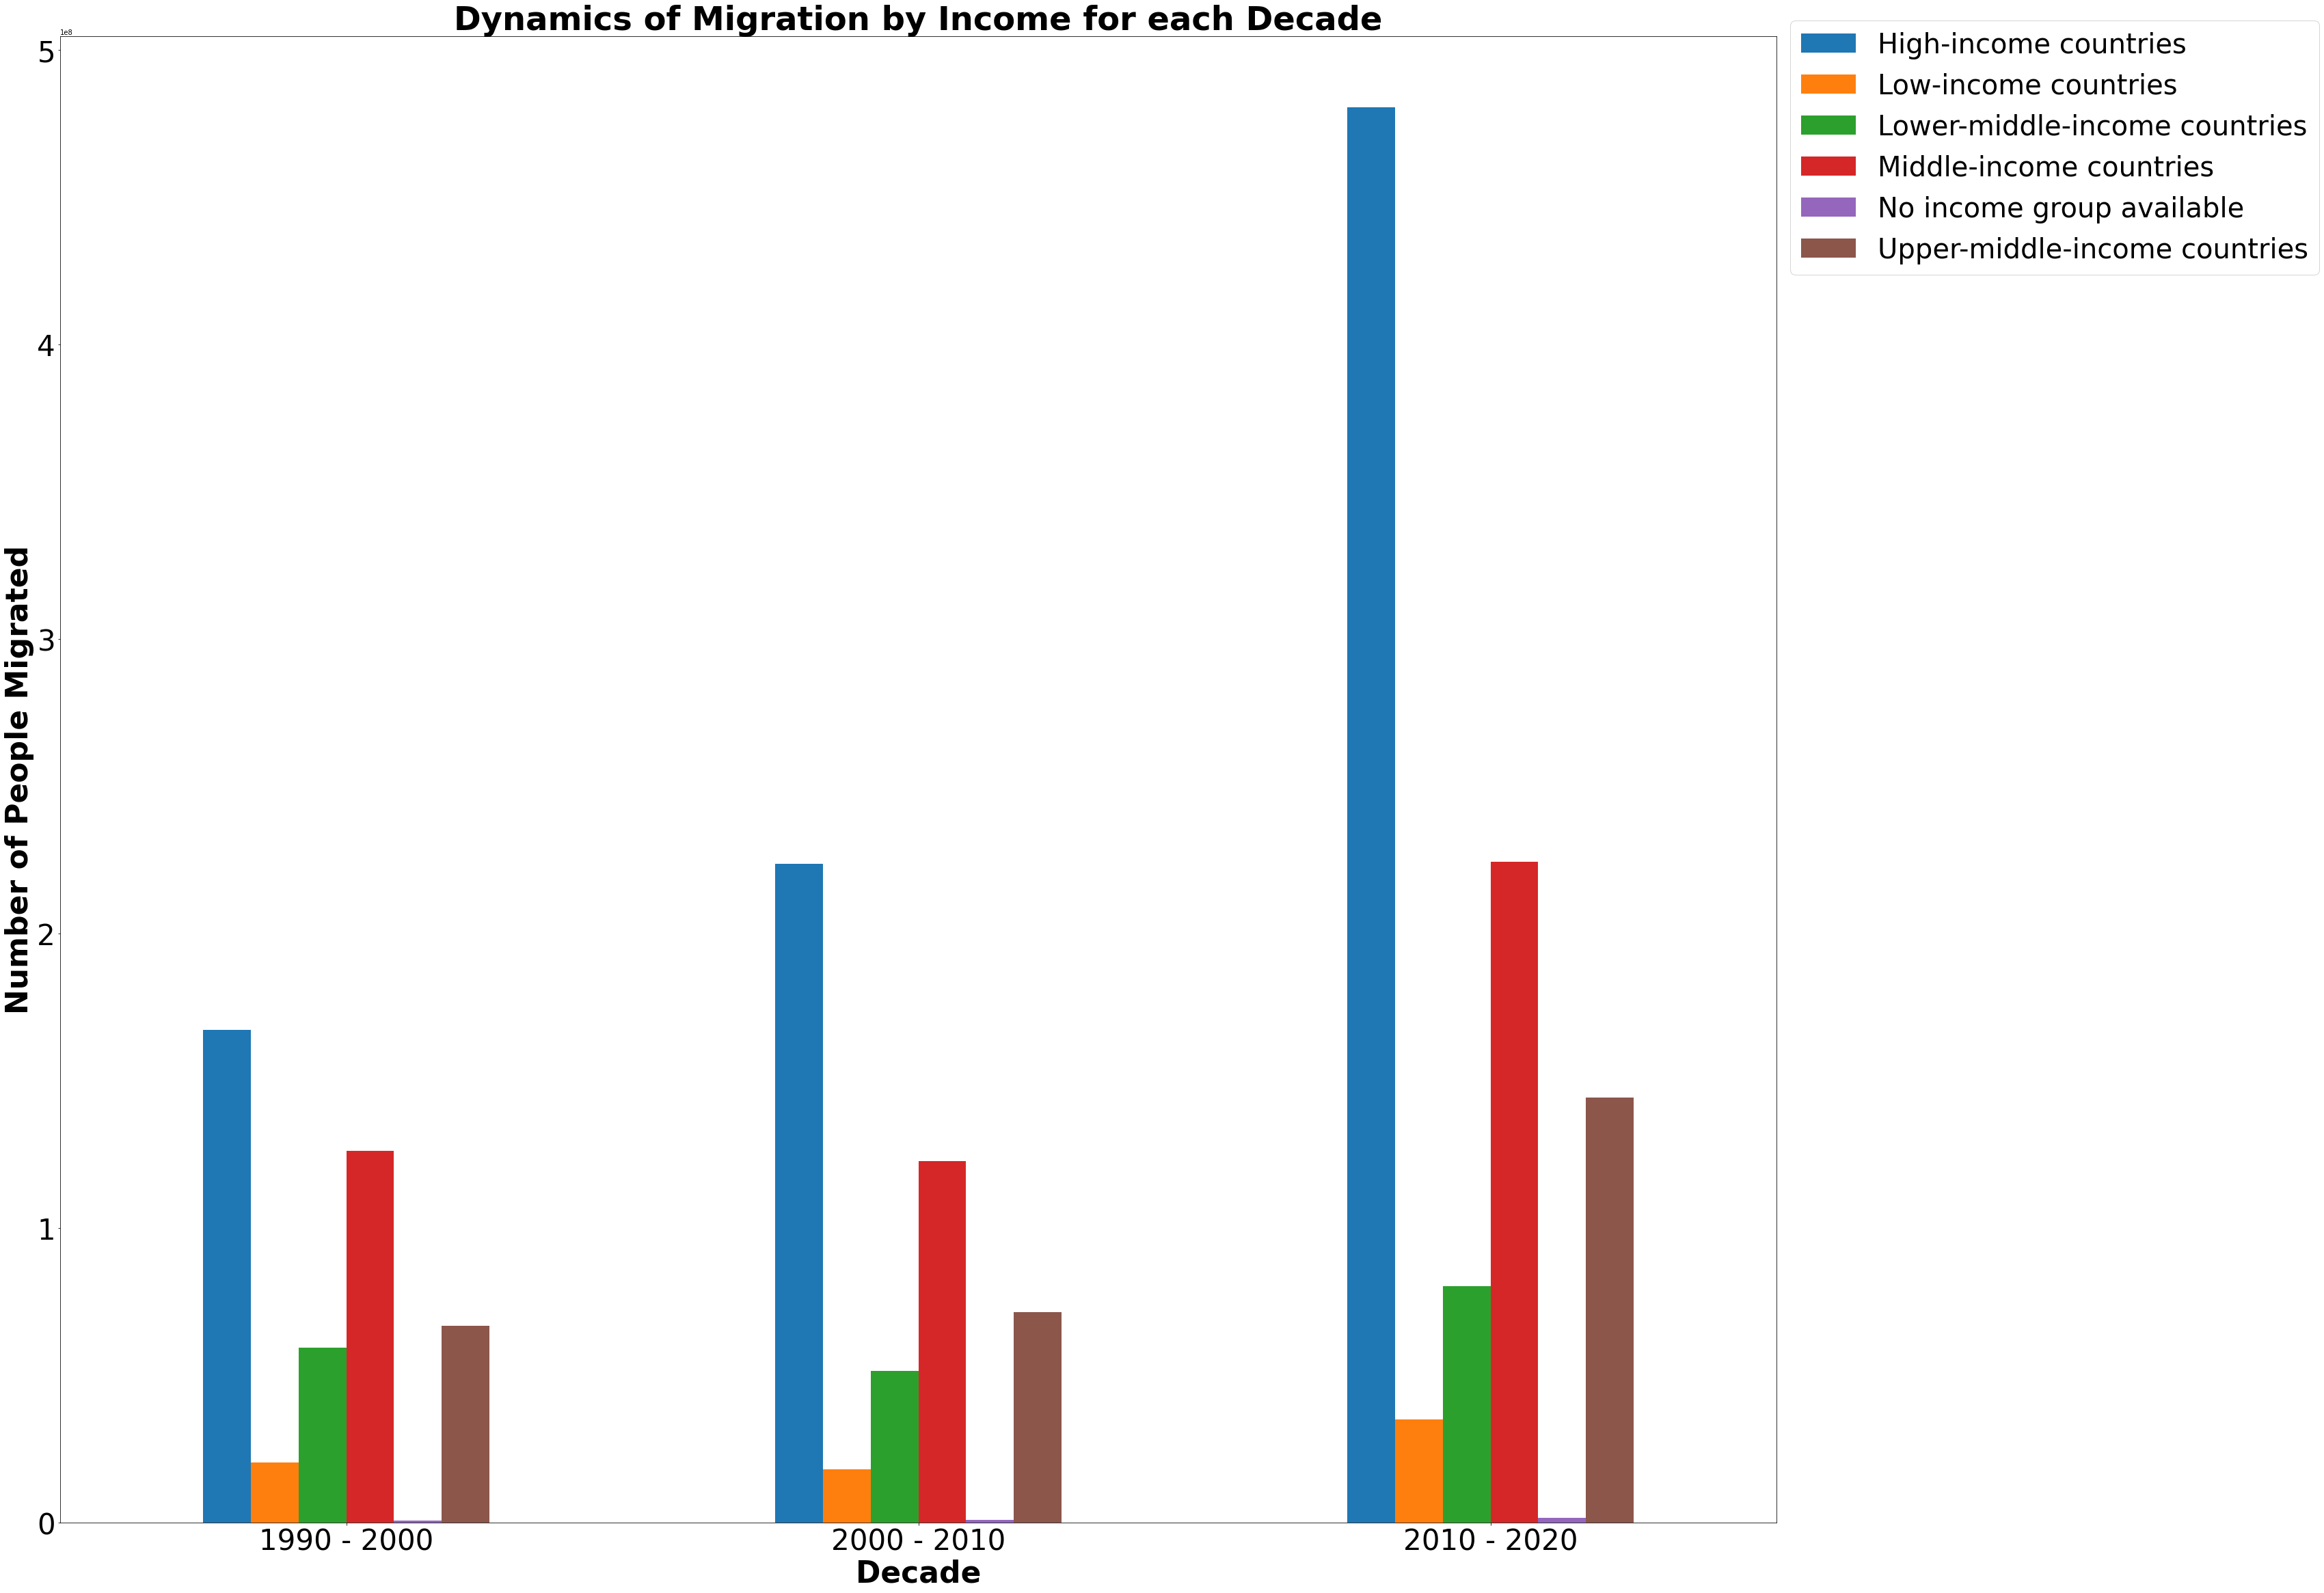

In [30]:
# gathering the required information
df_INCOME = df1.loc[(df1['Destination'] == 'High-income countries') | (df1['Destination'] == 'Middle-income countries') | (df1['Destination'] == 'Upper-middle-income countries') | (df1['Destination'] == 'Lower-middle-income countries') | (df1['Destination'] == 'No income group available') | (df1['Destination'] == 'Low-income countries')]
df_INCOME = df_INCOME.iloc[: , :3]

df_INCOME = df_INCOME.pivot(index='Year', columns = 'Destination', values = 'Total')

df_INCOME=df_INCOME.astype(float)

# calculating the values for each decade
first_decade = df_INCOME.iloc[0:2].sum()
first_decade.name = '1990 - 2000'
df_INCOME = df_INCOME.append(first_decade.transpose())

second_decade = df_INCOME.iloc[2:4].sum()
second_decade.name = '2000 - 2010'
df_INCOME = df_INCOME.append(second_decade.transpose())

third_decade = df_INCOME.iloc[4:7].sum()
third_decade.name = '2010 - 2020'
df_INCOME = df_INCOME.append(third_decade.transpose())

# selecting the rows with values for each decade
df_INCOME = df_INCOME.iloc[7:10]
  
# plotting the graph
plot1 = df_INCOME.plot(kind = 'bar', figsize = (45,40), fontsize=42)
plt.xticks(rotation=0)
plot1.set_xlabel('Decade', fontsize=44, fontweight='bold')
plot1.set_ylabel('Number of People Migrated', fontsize=44, fontweight='bold')
plot1.set_title('Dynamics of Migration by Income for each Decade', fontsize=48, fontweight='bold')
plot1.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=40)
plt.savefig("1990_2020_Income.png")


## **Dynamics of Migration by Regional Development for each Decade**

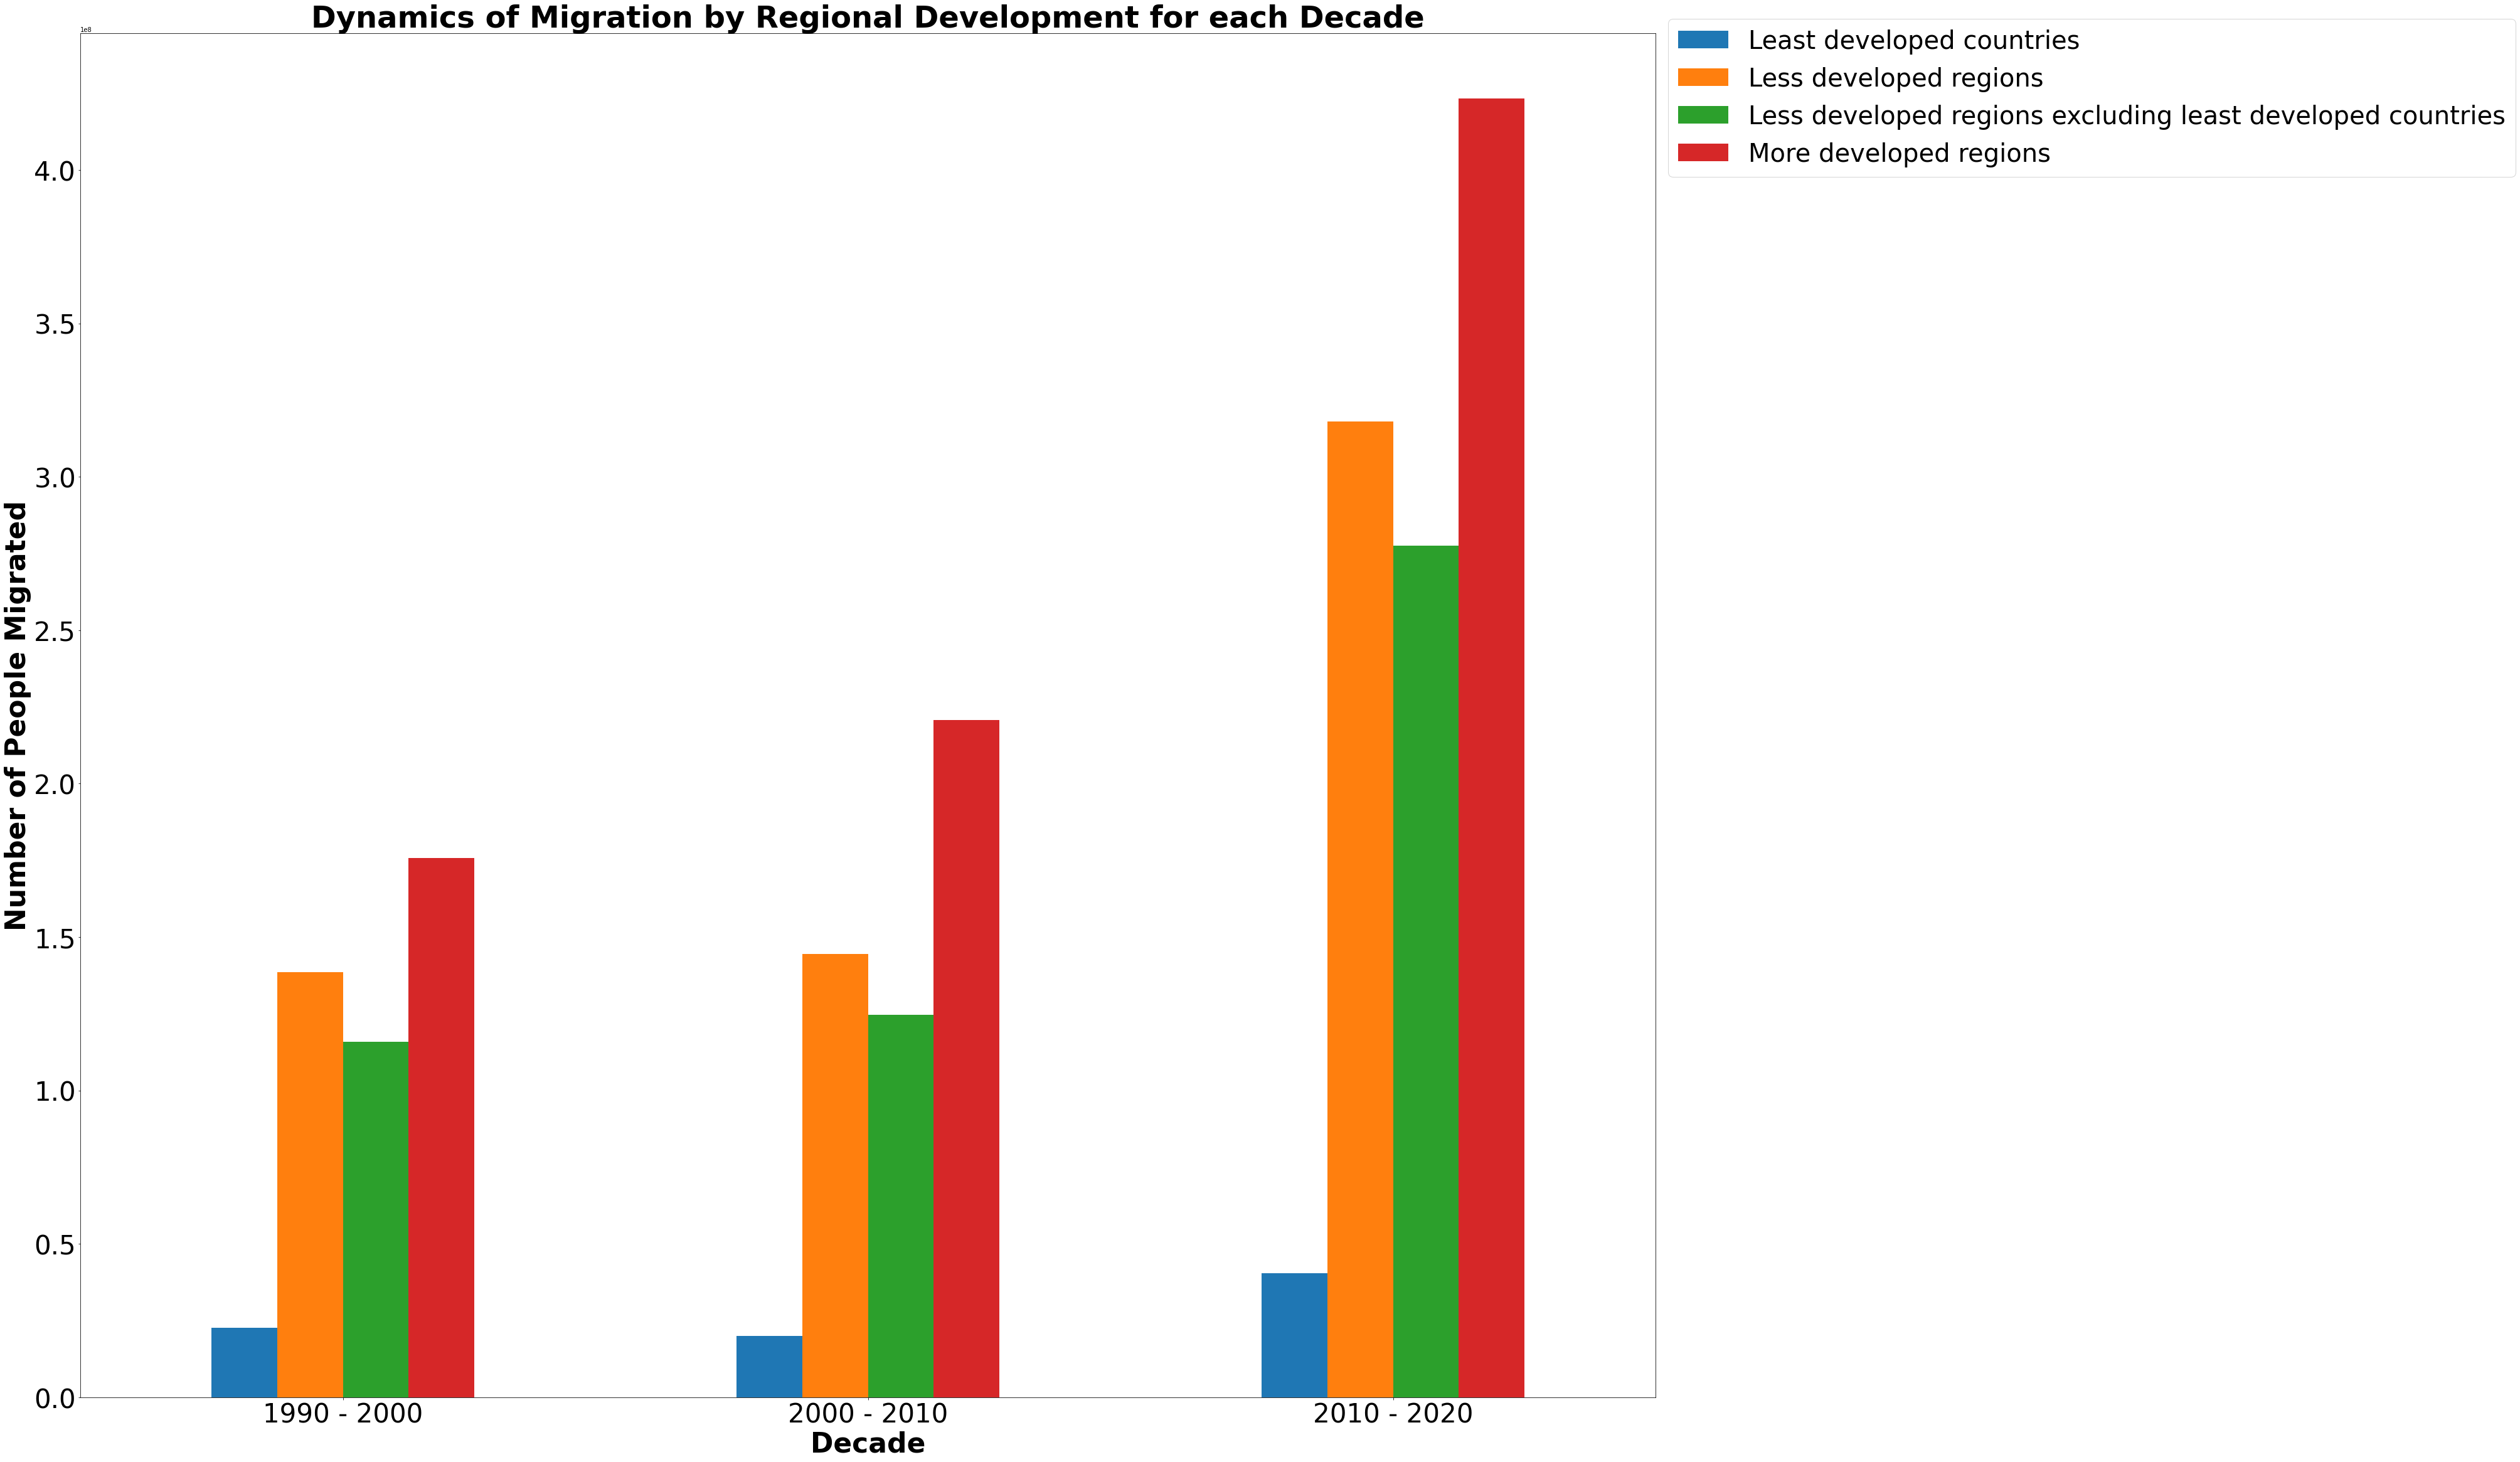

In [31]:
# gathering the required information
df_DEVELOPMENT = df1.loc[(df1['Destination'] == "More developed regions") | (df1['Destination'] == "Less developed regions") | (df1['Destination'] == "Least developed countries") | (df1['Destination'] == "Less developed regions excluding least developed countries")]
df_DEVELOPMENT = df_DEVELOPMENT.iloc[: , :3]

df_DEVELOPMENT = df_DEVELOPMENT.pivot(index='Year', columns = 'Destination', values = 'Total')

df_DEVELOPMENT=df_DEVELOPMENT.astype(float)

# calculating the values for each decade
first_decade = df_DEVELOPMENT.iloc[0:2].sum()
first_decade.name = '1990 - 2000'
df_DEVELOPMENT = df_DEVELOPMENT.append(first_decade.transpose())

second_decade = df_DEVELOPMENT.iloc[2:4].sum()
second_decade.name = '2000 - 2010'
df_DEVELOPMENT = df_DEVELOPMENT.append(second_decade.transpose())

third_decade = df_DEVELOPMENT.iloc[4:7].sum()
third_decade.name = '2010 - 2020'
df_DEVELOPMENT = df_DEVELOPMENT.append(third_decade.transpose())

# selecting the rows with values for each decade
df_DEVELOPMENT = df_DEVELOPMENT.iloc[7:10]

# plotting the graph
plot2 = df_DEVELOPMENT.plot(kind = 'bar', figsize = (45,40), fontsize=42)
plt.xticks(rotation=0)
plot2.set_xlabel('Decade', fontsize=44, fontweight='bold')
plot2.set_ylabel('Number of People Migrated', fontsize=44, fontweight='bold')
plot2.set_title('Dynamics of Migration by Regional Development for each Decade', fontsize=48, fontweight='bold')
plot2.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=40)
plt.savefig("1990_2020_RegionalDevelopment.png")

## **Dynamics of Migration by Geographic Region for each decade**

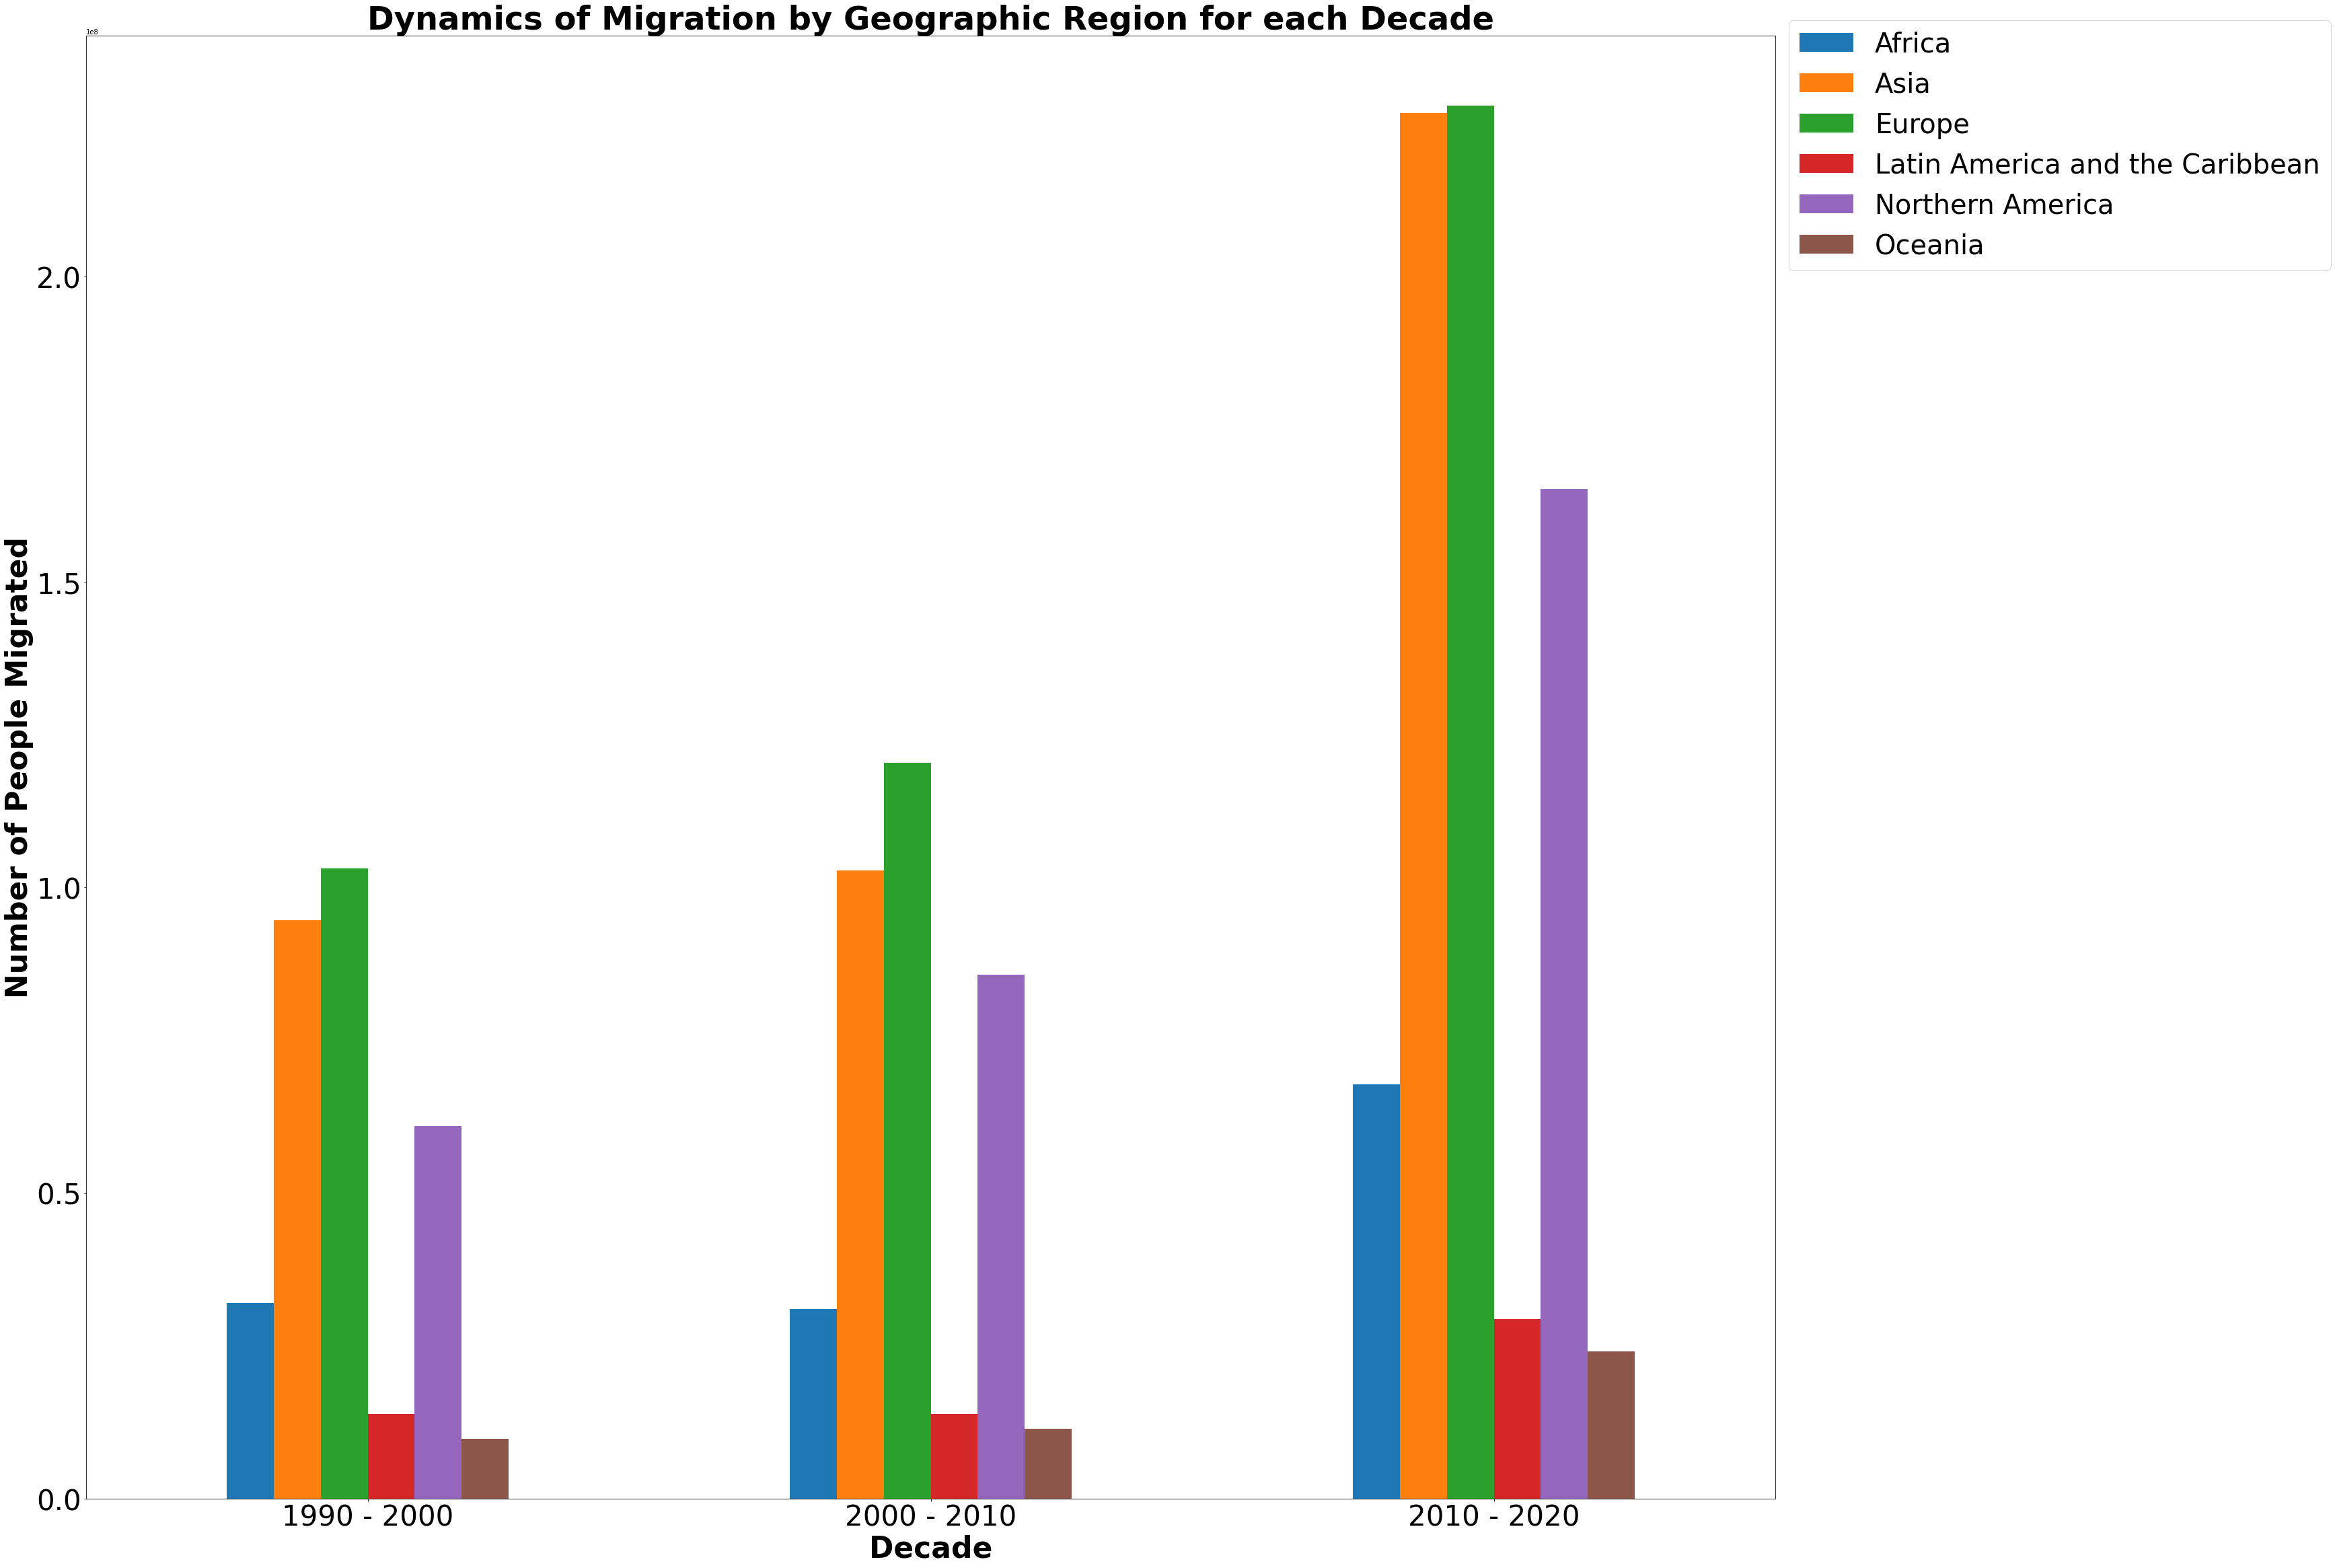

In [32]:
# gathering the required information
df_GEOGRAPHY = df1.loc[(df1['Destination'] == 'Africa') | (df1['Destination'] == 'Asia') | (df1['Destination'] == 'Europe') | (df1['Destination'] == 'Latin America and the Caribbean') | (df1['Destination'] == 'Northern America') | (df1['Destination'] == 'Oceania')]
df_GEOGRAPHY = df_GEOGRAPHY.iloc[: , :3]

df_GEOGRAPHY = df_GEOGRAPHY.pivot(index='Year', columns = 'Destination', values = 'Total')
df_GEOGRAPHY=df_GEOGRAPHY.astype(float)

# calculating the values for each decade
first_decade = df_GEOGRAPHY.iloc[0:2].sum()
first_decade.name = '1990 - 2000'
df_GEOGRAPHY = df_GEOGRAPHY.append(first_decade.transpose())

second_decade = df_GEOGRAPHY.iloc[2:4].sum()
second_decade.name = '2000 - 2010'
df_GEOGRAPHY = df_GEOGRAPHY.append(second_decade.transpose())

third_decade = df_GEOGRAPHY.iloc[4:7].sum()
third_decade.name = '2010 - 2020'
df_GEOGRAPHY = df_GEOGRAPHY.append(third_decade.transpose())

# selecting the rows with values for each decade
df_GEOGRAPHY = df_GEOGRAPHY.iloc[7:10]

# plotting the graph
plot3 = df_GEOGRAPHY.plot(kind = 'bar', figsize = (45,40), fontsize=42)
plt.xticks(rotation=0)
plot3.set_xlabel('Decade', fontsize=44, fontweight='bold')
plot3.set_ylabel('Number of People Migrated', fontsize=44, fontweight='bold')
plot3.set_title('Dynamics of Migration by Geographic Region for each Decade', fontsize=48, fontweight='bold')
plot3.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=40)
plt.savefig("1990_2020_GeographicRegion.png")

## **Finding the top 5 origins for people migrating to Europe for the decade - 1990 to 2000**

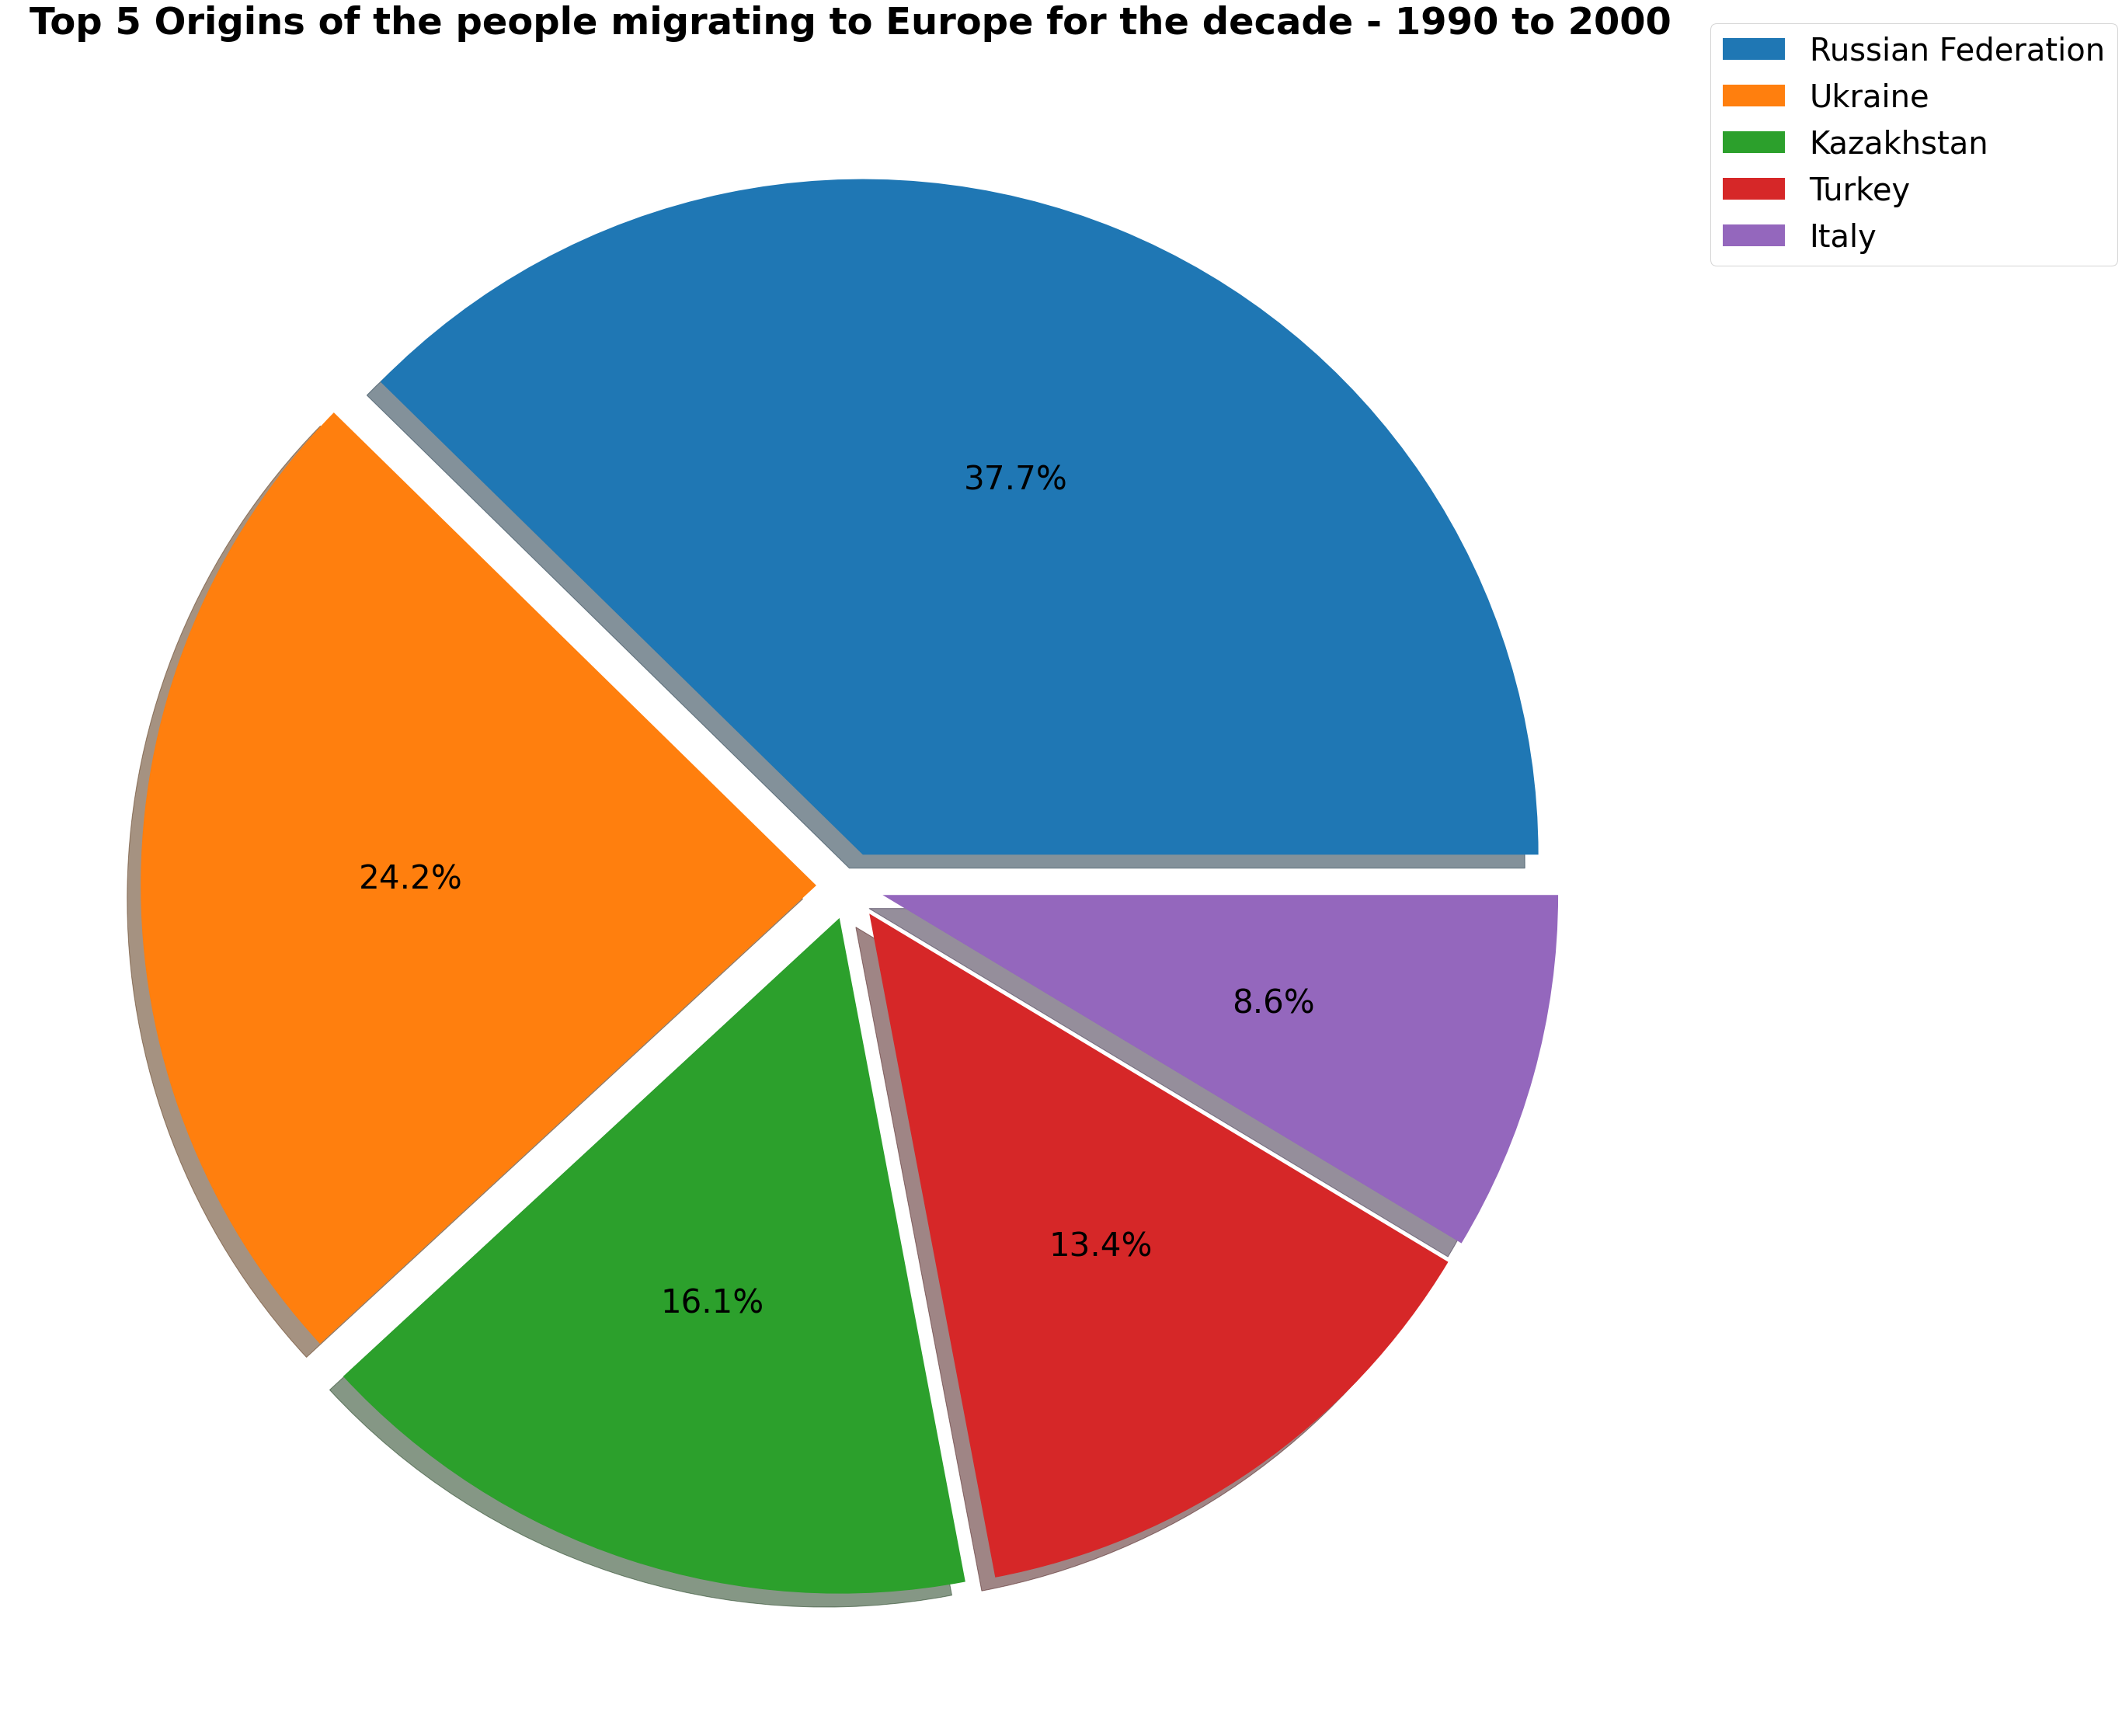

In [33]:
# gathering the required information
df_EU = df1.loc[(df1['Destination'] == 'Europe')]
df_EU.reset_index(drop=True, inplace=True)
df_EU = df_EU.set_index(['Year'])

# calculating the values for each decade
first_decade = df_EU.iloc[0:2].sum()
first_decade.name = '1990 - 2000'
df_EU = df_EU.append(first_decade.transpose())

second_decade = df_EU.iloc[2:4].sum()
second_decade.name = '2000 - 2010'
df_EU = df_EU.append(second_decade.transpose())

third_decade = df_EU.iloc[4:7].sum()
third_decade.name = '2010 - 2020'
df_EU = df_EU.append(third_decade.transpose())

# selecting the rows with values for each decade
df_EU = df_EU.iloc[7:10]

# dropping the "Destination" and "Total"
df_EU.drop(df_EU.columns[[0,1]], axis=1, inplace=True)

# transposing the matrix
df_EU = df_EU.transpose()

# finding the 5 places with largest migration to Europe for the decade 1990 - 2000
df_EU_first_decade = df_EU[df_EU.columns[0:1]]
df_EU_first_decade_largest = df_EU_first_decade.nlargest(n=5, columns=['1990 - 2000'])

# plotting the graph
plot4 = df_EU_first_decade_largest.plot.pie(y='1990 - 2000',explode=[0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, legend=True, ylabel='', labeldistance=None, figsize=(45, 40), fontsize = 42)
plot4.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=40)
plot4.set_title('Top 5 Origins of the people migrating to Europe for the decade - 1990 to 2000', fontsize=48, fontweight='bold')
plt.savefig("1990_2000_EU.png")

## **Finding the top 5 origins for people migrating to Europe for the decade - 2000 to 2010**

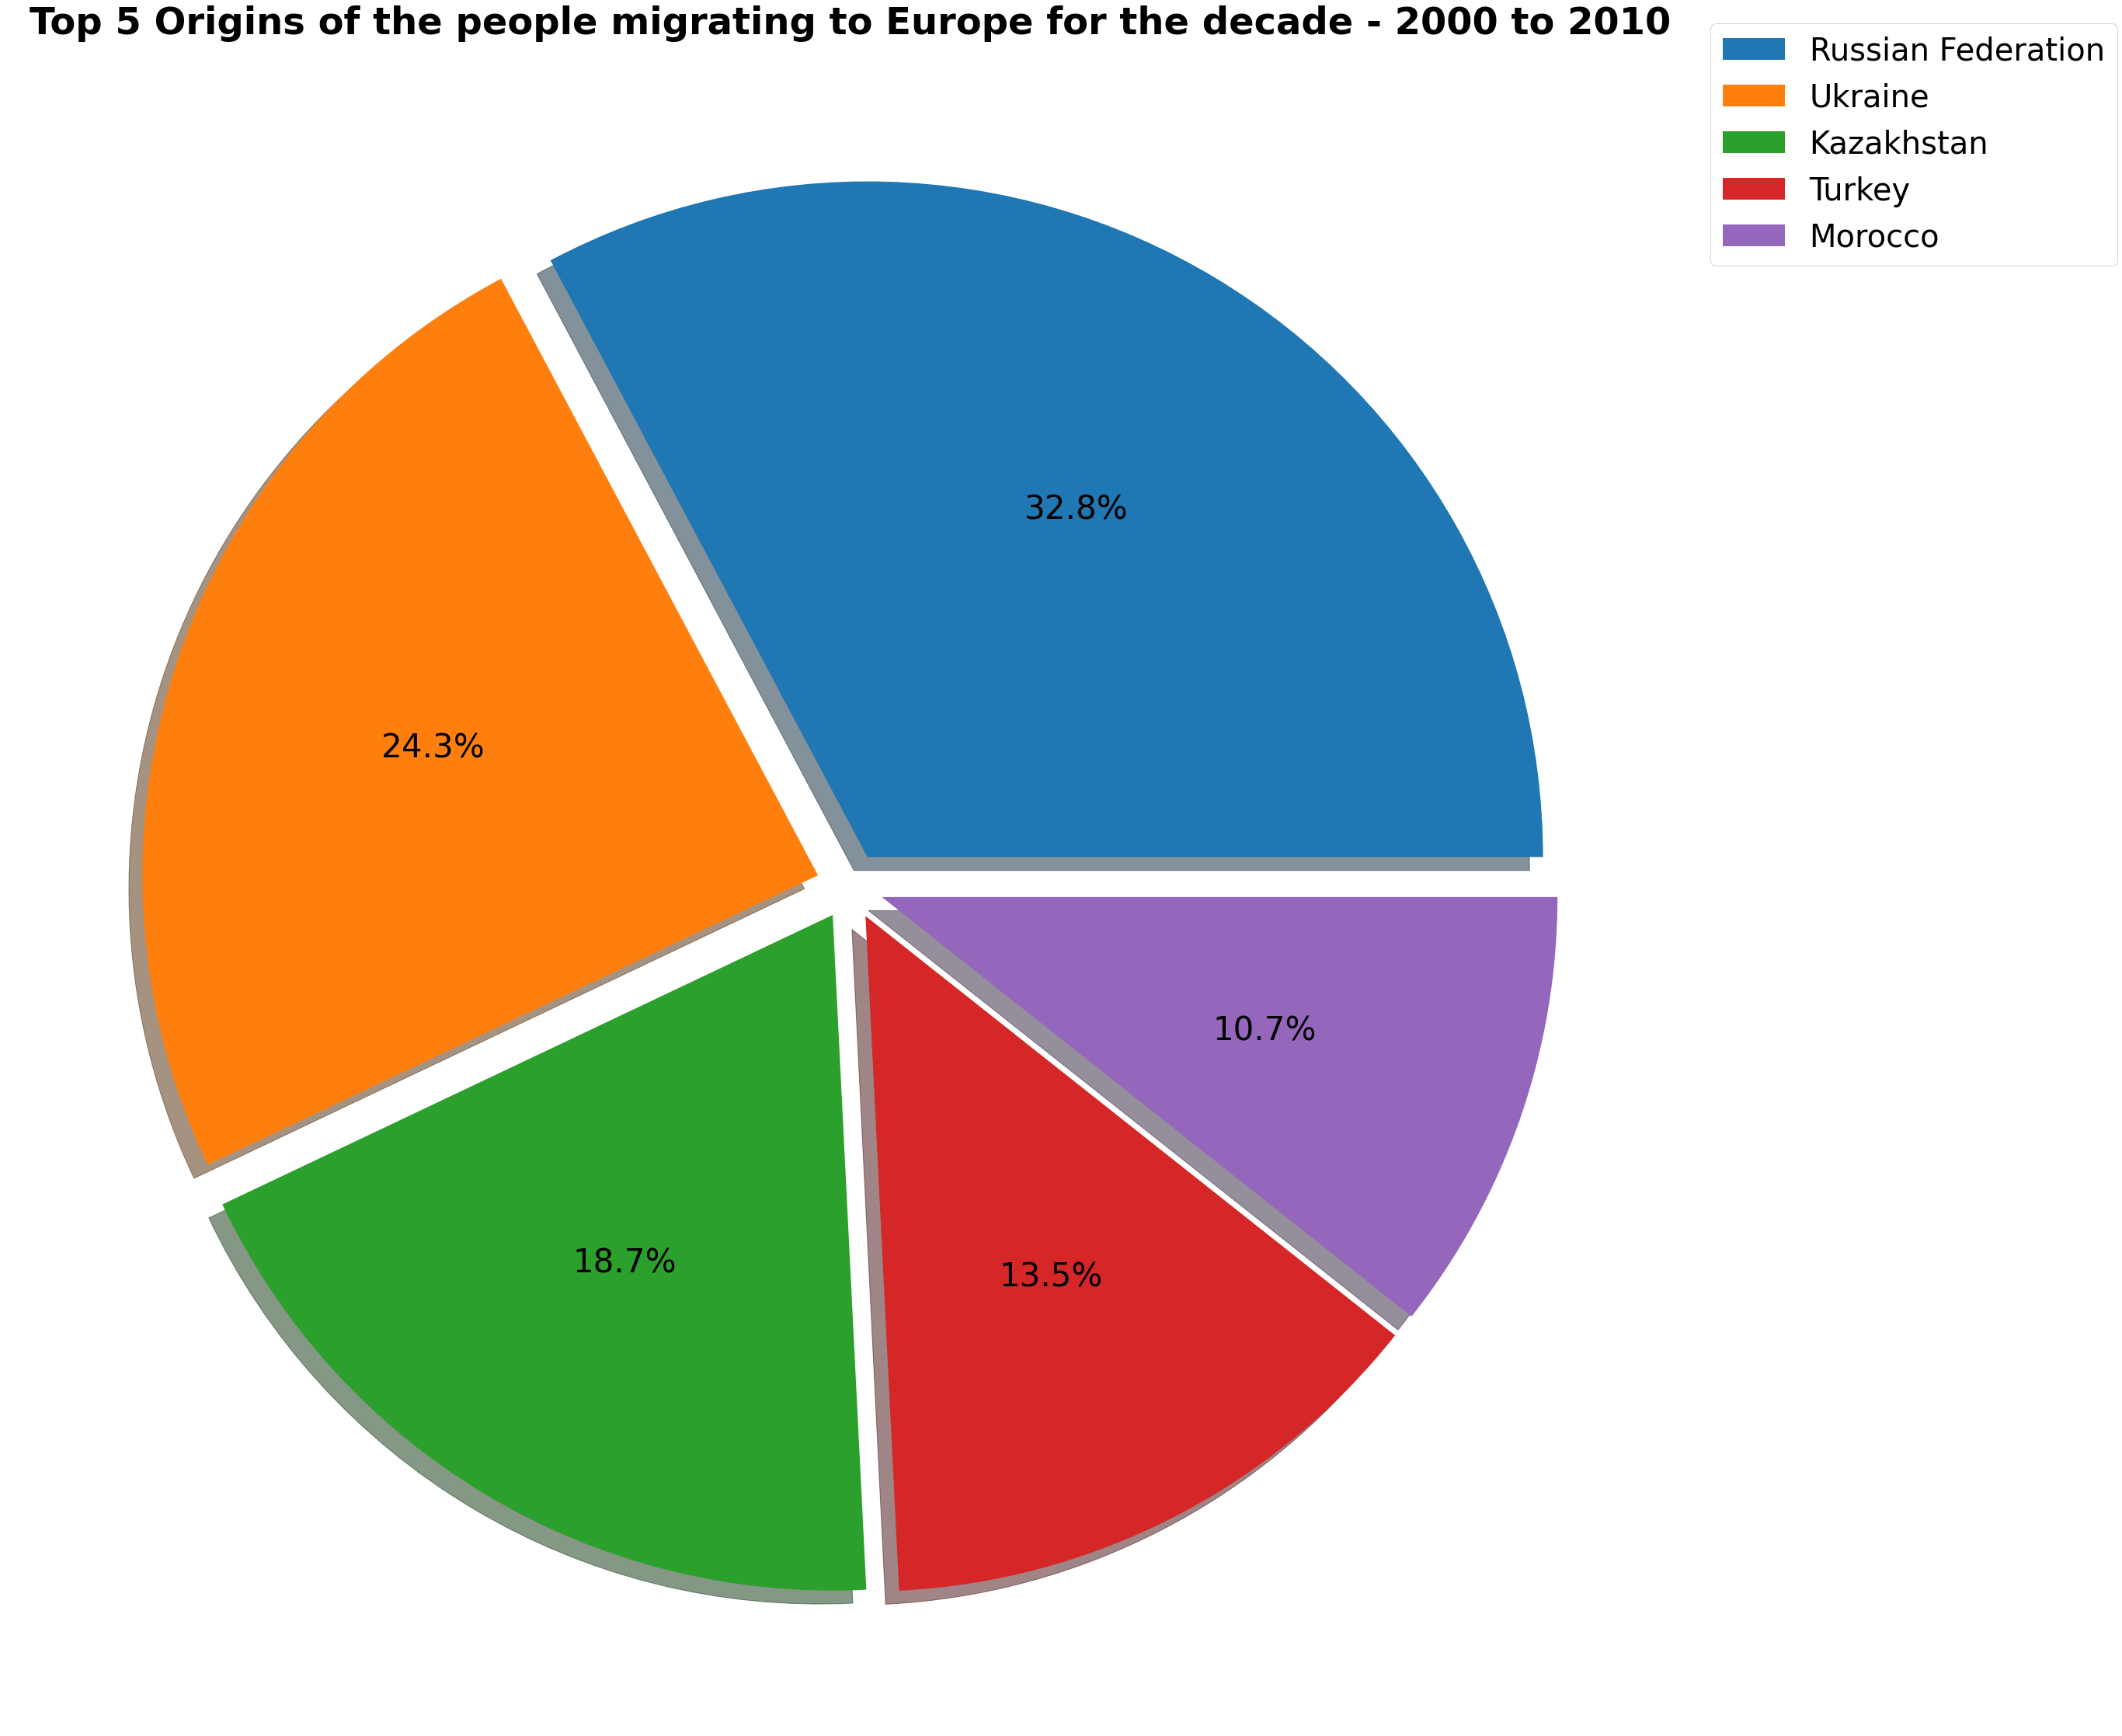

In [34]:
# finding the 5 places with largest migration to Europe for the decade 2000 - 2010
df_EU_second_decade = df_EU[df_EU.columns[1:2]]
df_EU_second_decade_largest = df_EU_second_decade.nlargest(n=5, columns=['2000 - 2010'])

# plotting the graph
plot5 = df_EU_second_decade_largest.plot.pie(y='2000 - 2010',explode=[0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, legend=True, ylabel='', labeldistance=None, figsize=(45, 40), fontsize = 42)
plot5.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=40)
plot5.set_title('Top 5 Origins of the people migrating to Europe for the decade - 2000 to 2010', fontsize=48, fontweight='bold')
plt.savefig("2000_2010_EU.png")

## **Finding the top 5 origins for people migrating to Europe for the decade - 2010 to 2020**

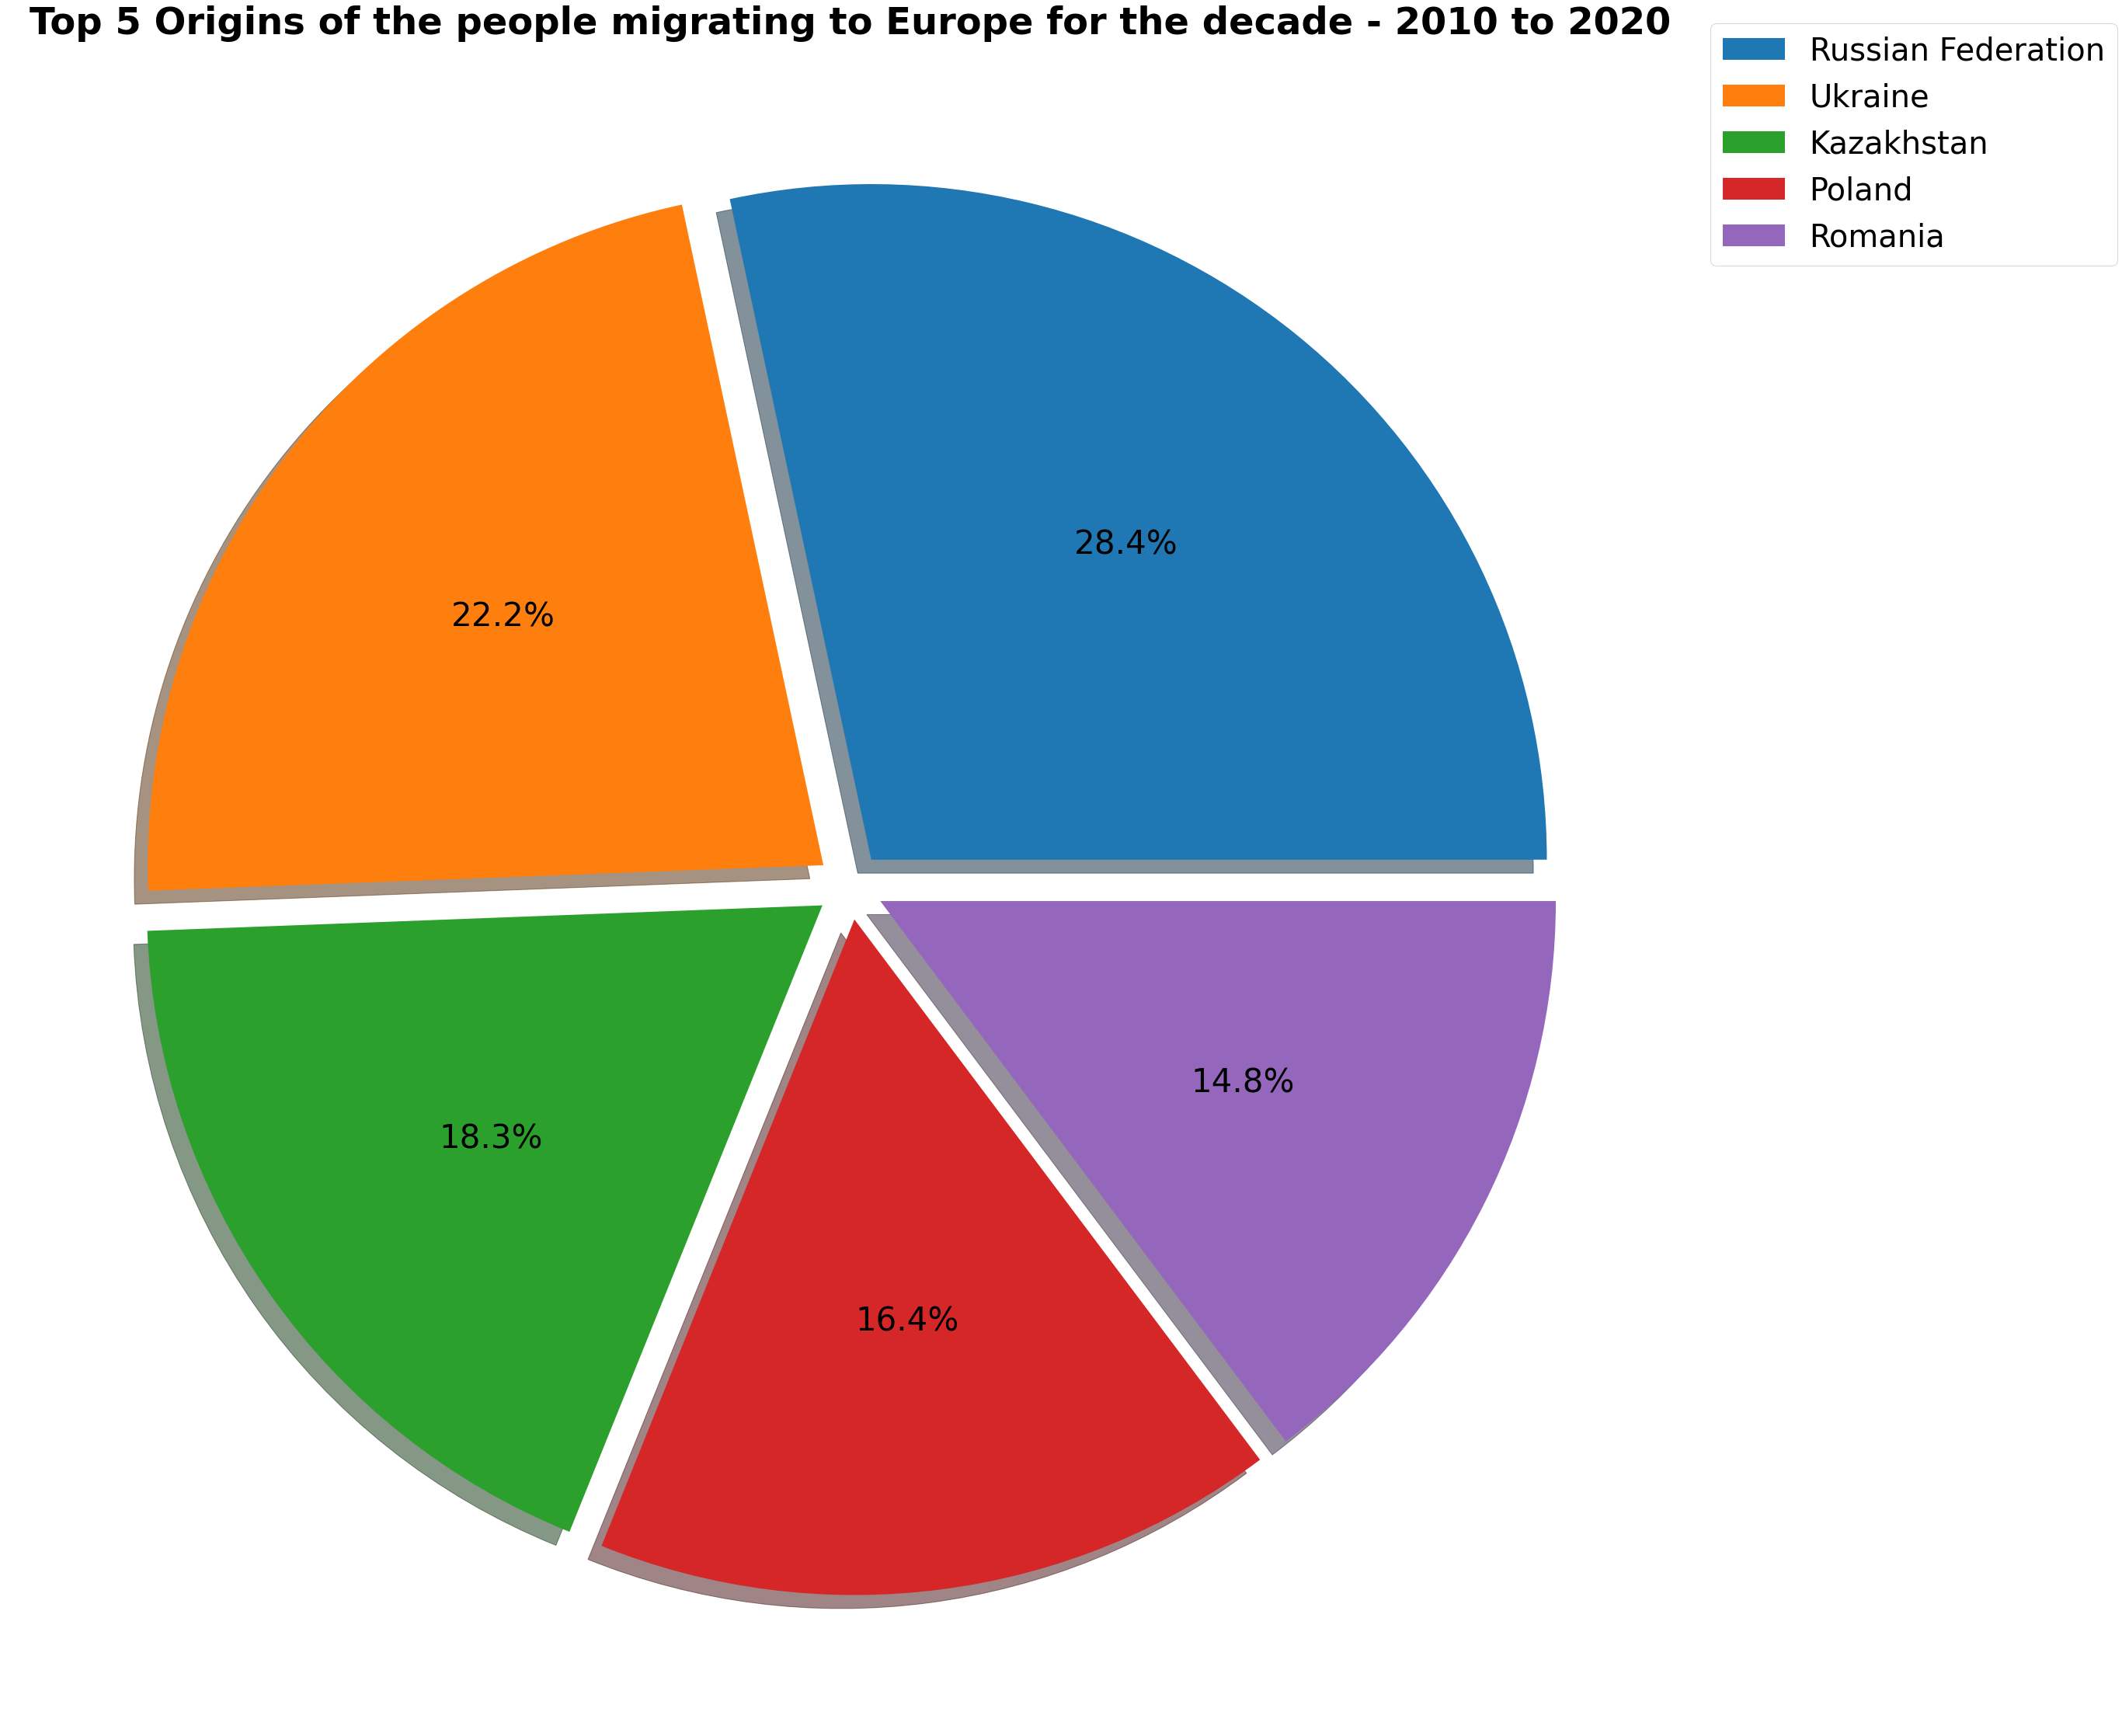

In [35]:
# finding the 5 places with largest migration to Europe for the decade 2010 - 2020
df_EU_third_decade = df_EU[df_EU.columns[2:3]]
df_EU_third_decade_largest = df_EU_third_decade.nlargest(n=5, columns=['2010 - 2020'])

# plotting the graph
plot6 = df_EU_third_decade_largest.plot.pie(y='2010 - 2020',explode=[0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, legend=True, ylabel='', labeldistance=None, figsize=(45, 40), fontsize = 42)
plot6.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=40)
plot6.set_title('Top 5 Origins of the people migrating to Europe for the decade - 2010 to 2020', fontsize=48, fontweight='bold')
plt.savefig("2010_2020_EU.png")

## **Finding the total migrations in the world for each year**

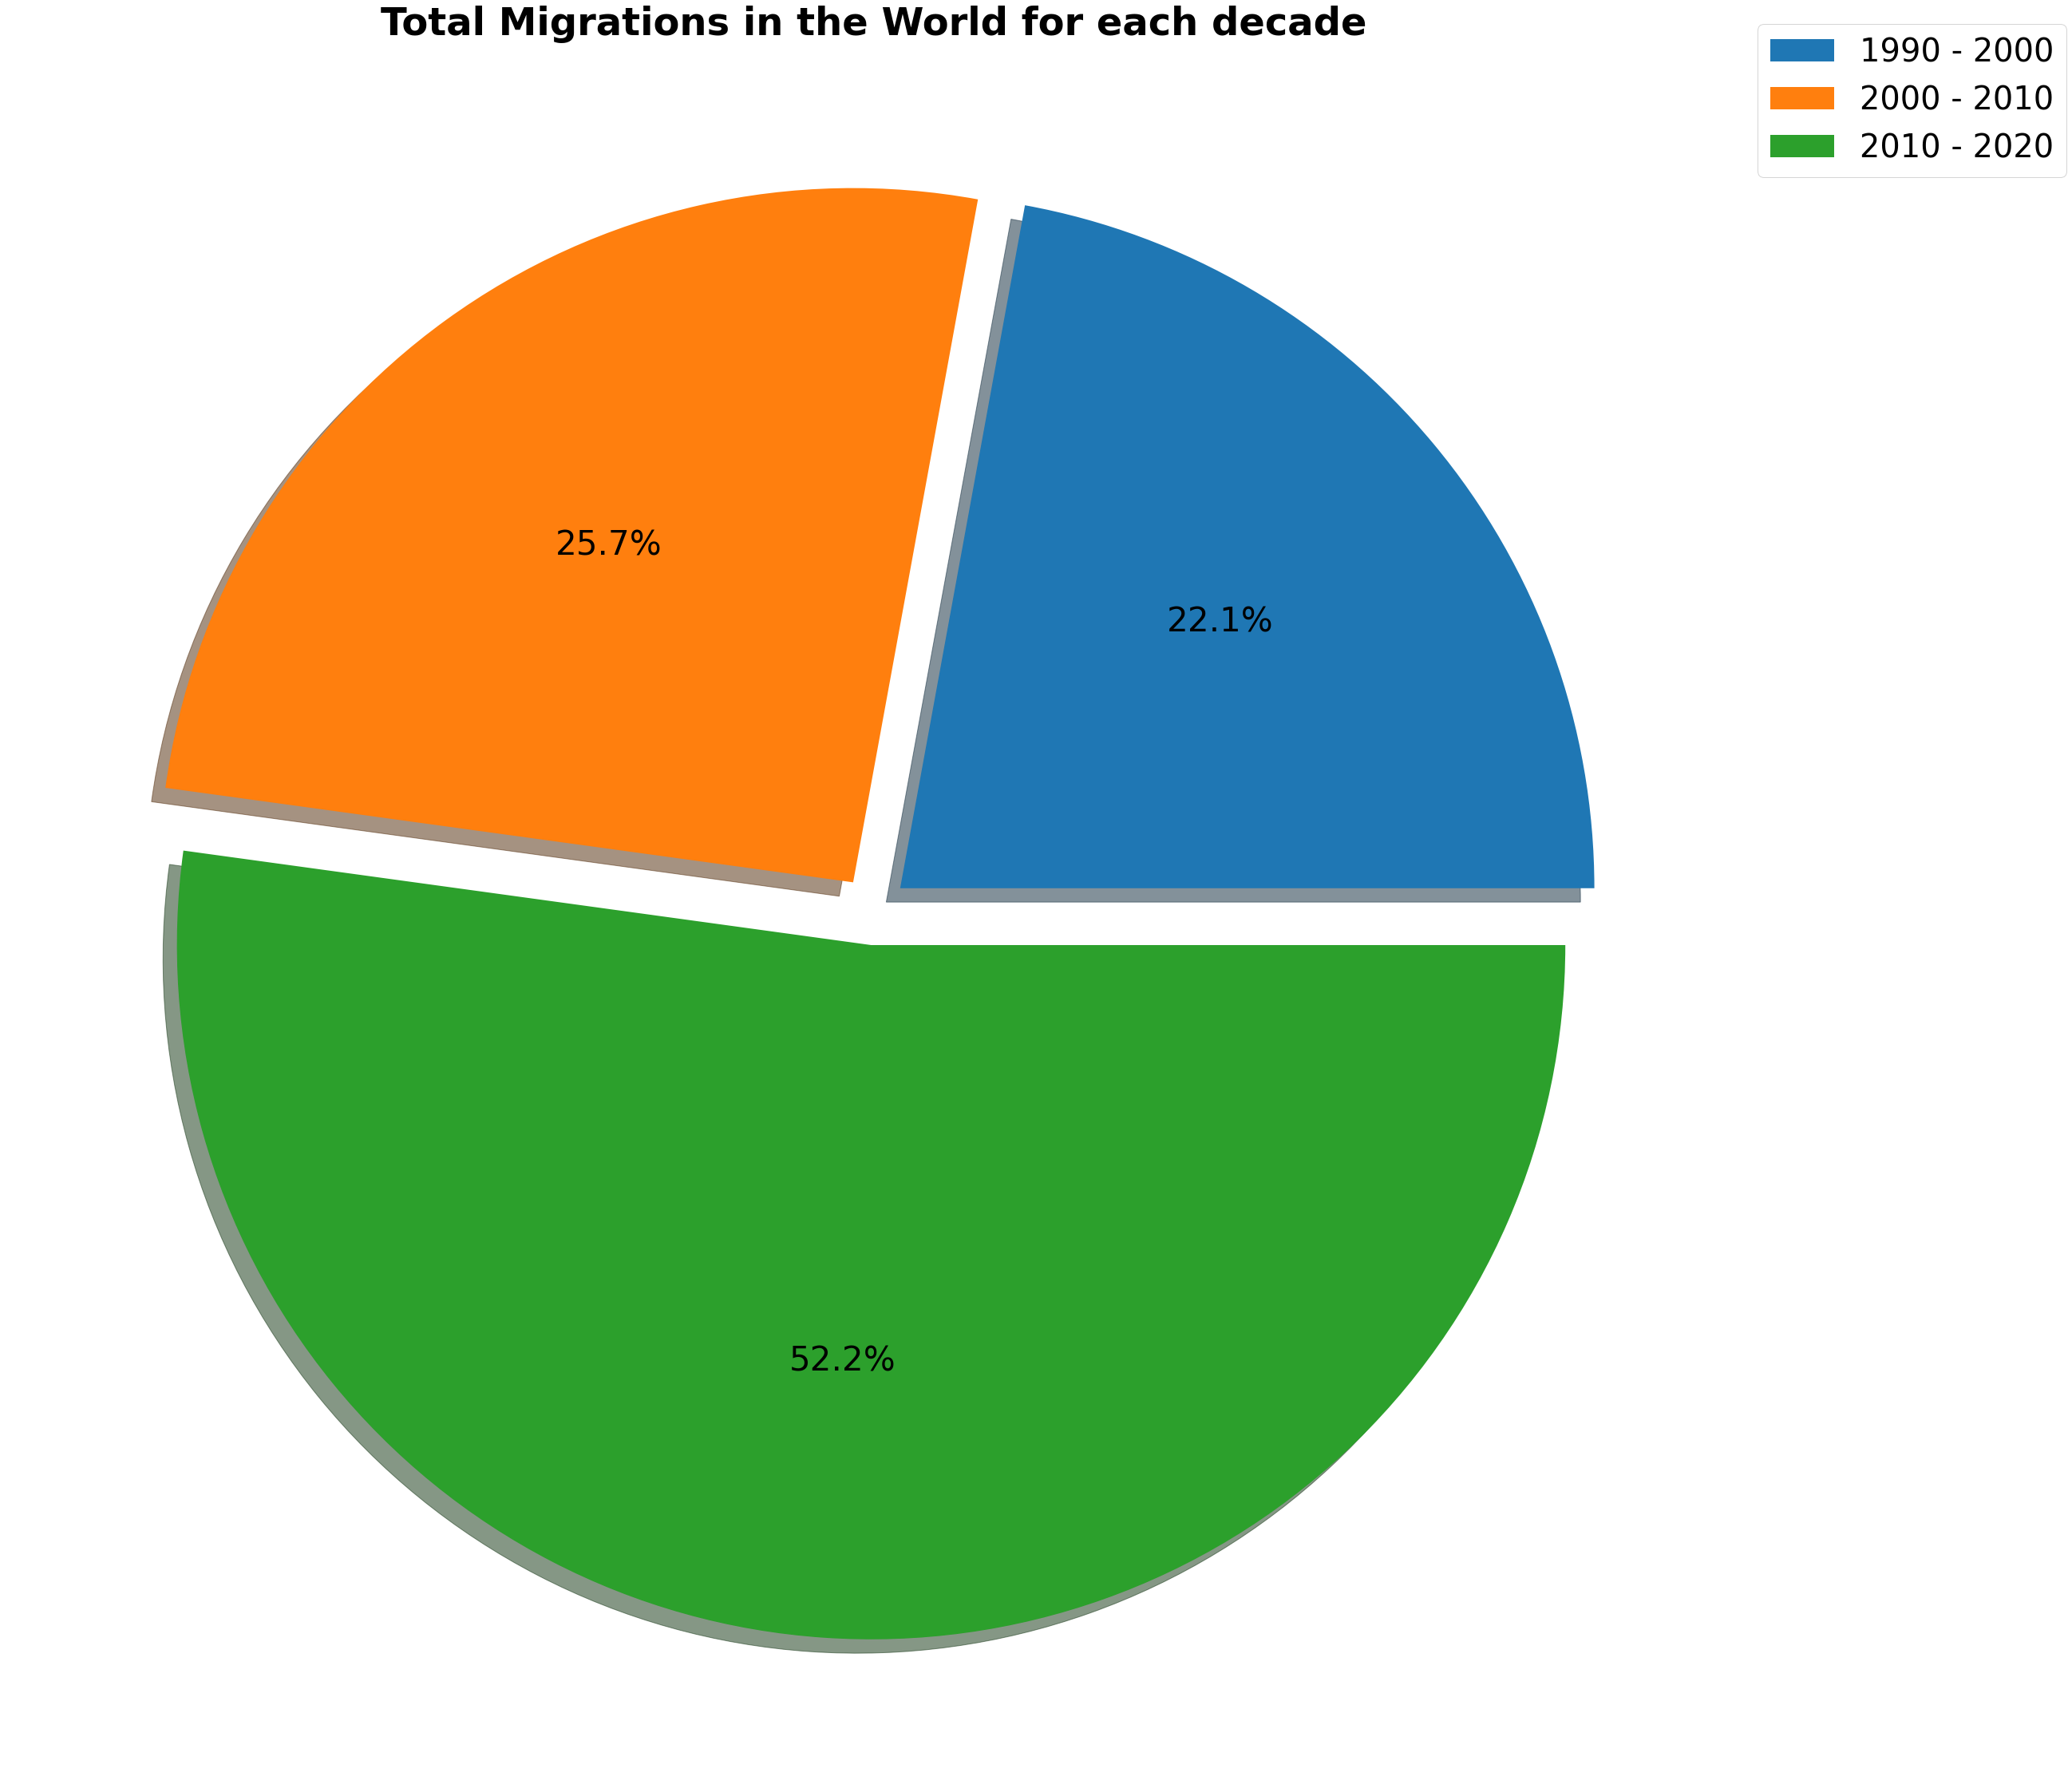

In [36]:
# getting the required information
df_WORLD = df1.loc[(df1['Destination'] == 'WORLD')]
df_WORLD.reset_index(drop=True, inplace=True)
df_WORLD = df_WORLD.set_index(['Year'])
df_WORLD = df_WORLD.iloc[: , :2]

# calculating the values for each decade
first_decade = df_WORLD.iloc[0:2].sum()
first_decade.name = '1990 - 2000'
df_WORLD = df_WORLD.append(first_decade.transpose())

second_decade = df_WORLD.iloc[2:4].sum()
second_decade.name = '2000 - 2010'
df_WORLD = df_WORLD.append(second_decade.transpose())

third_decade = df_WORLD.iloc[4:7].sum()
third_decade.name = '2010 - 2020'
df_WORLD = df_WORLD.append(third_decade.transpose())

# selecting the rows with values for each decade
df_WORLD = df_WORLD.iloc[7:10]

# plotting the graph
plot4 = df_WORLD.plot.pie(y='Total',explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, legend=True, ylabel='', labeldistance=None, figsize=(45, 40), fontsize = 42)
plot4.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=40)
plot4.set_title('Total Migrations in the World for each decade', fontsize=48, fontweight='bold')
plt.savefig("1990_2020_World.png")